In [1]:
%matplotlib inline
import math
from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt
from  sklearn.decomposition import PCA

## Rate models

We first start with a simple ratemodel of a neuron.

$ \tau \dot{w} = -w + i $ where $i$ is input

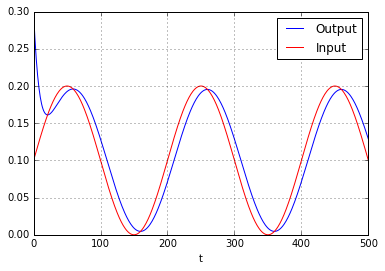

In [2]:
def eqs(y,t):
    tau=10
    dydt=(-y  + I(t))/tau
    return dydt

# def I(t):
#     return 0.1

# def I(t):
#     if t>500 and t<700:
#         return 0.1
#     return 0

def I(t):
    T=200
    return 0.1*np.sin(2*np.pi*t/T)+0.1


y0=[0.3]
tmax=0.5
t = np.linspace(0, tmax*1000, tmax*1000+1)
sol = odeint(eqs, y0, t , hmax=1)
plt.plot(t, sol[:, 0], 'b',label="Output")
plt.plot(t, map(I,t), 'r',label="Input")
plt.legend(loc='best')
plt.xlabel('t')
plt.grid()
plt.show()


Lets make a neuron with an autoapse, a synapse with itself

$ \tau \dot{y} = -y + Wy + i $

1. Play with the W value to find what the behaviour is for different W. What point does the behaviour change? 
2. How does the neuron respond to different input values.


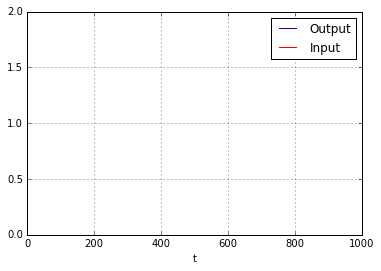

In [3]:
def eqs(y,t):
    tau=5
    W=1.
    dydt=(-y  + W * y + I(t))/tau
    return dydt

def I(t):
    return 0

# def I(t):
#     if t>500 and t<700:
#         return 0.1
#     return 0

# def I(t):
#     T=200
#     return 0.1*np.sin(2*np.pi*t/T) +0.1


y0=[2]
tmax=1
t = np.linspace(0, tmax*1000, tmax*1000+1)
sol = odeint(eqs, y0, t , hmax=1)
plt.plot(t, sol[:, 0], 'b',label="Output")
plt.plot(t, map(I,t), 'r',label="Input")
plt.legend(loc='best')
plt.xlabel('t')
plt.grid()
plt.show()


## Mutually Inhibitory Pair

$ \tau \dot{x_1} = -\bar{x_1} - \beta x_2 +b_1  $

$ \tau \dot{x_2} = -\bar{x_2} - \beta x_1 +b_2  $

which can be written in the vector form as:

$ \tau \dot{\bar{y}} = -\bar{y} + W\bar{y} + \bar{b} $


See the effect of changing beta and b


In [ ]:
def eqs(y,t):
    tau=np.array([2,4])
    b=np.array([0.2,0.1])
    beta=0.5
    W=np.array([[0, -beta],[-beta,0]])
    dydt=(-y +  W.dot(y) + b)/tau 
    return dydt

y0=np.array([0.1,0.3])
# t = np.linspace(0, 20, 1001)
tmax=0.1
t = np.linspace(0, tmax*1000, tmax*1000+1)

sol = odeint(eqs, y0, t, hmax=1)
plt.plot(t, sol[:, 0], 'b') #x1
plt.plot(t, sol[:, 1], 'g') #x2
plt.show()

Transforming 

$z_1=x_1+x_2$ 
and 
$z_2=x_1-x_2$ 

we get 

$ \tau \dot{z_1} = -\bar{z_1} - \beta z_1 + (b_1+b_2)  $

$ \tau \dot{z_2} = -\bar{z_2} + \beta z_2 + (b_1-b_2)  $

In [ ]:
plt.plot(t, sol[:, 0] + sol[:, 1], 'b') #x1+x2
plt.plot(t, sol[:, 0] - sol[:, 1], 'g') #x1-x2
plt.show() 

In [ ]:
# The Wilson-Cowan Model
# Set the fixed parameters
global a,b,c,d,q,p
a=15
b=18
c=16
d=15
# the wilson-cowan equations


def eqs(y,t):
    E,I=y
    E_prime=-E+f(a*E-b*I+p(t))
    I_prime=-I+f(c*E-d*I+q(t))
    dydt=[E_prime,I_prime]
    return dydt

def f(x):
    if x>0:
        return x
#         return np.tanh(x)
    return 0
    

p = lambda t : 10
q = lambda t : 5 

y0=[0.2,0.9]
t = np.linspace(0, 10, 1001)
sol = odeint(eqs, y0, t)

import matplotlib.pyplot as plt
plt.plot(t, sol[:, 0], 'b', label='E')
plt.plot(t, sol[:, 1], 'g', label='I')
plt.legend(loc='best')
plt.xlabel('t')
plt.grid()
plt.show()

## Misha's paper


Paradoxical Effects of External Modulation of Inhibitory Interneurons
Misha V. Tsodyks, William E. Skaggs, Terrence J. Sejnowski, and Bruce L. McNaughton 

Try to change the parameters: tau s and J to see what happens.



Look for the effect : "changes in external input to inhibitory interneurons can cause their activity to be modulated in the direction opposite to the change in the input if the intrinsic excitatory connections are sufficiently strong."

In [ ]:
def eqs(y,t):
    tau_e=20.0
    tau_i=10.0
    Jee=40.0
    Jei=25.0
    Jie=30.0
    Jii=15.0
    E,I = y
    dEdt = (-E+g_e(Jee *E - Jei * I + e(t)))/tau_e
    dIdt = (-I+g_i(Jie *E - Jii * I + i(t)))/tau_i
    dydt=[dEdt, dIdt]
    return dydt

T=120
def e(t):
    return 0.1
def i(t):
    return 0.1*np.sin(2*np.pi*t/T)
def g_e(x):
    if x>0:
        return np.tanh(x)
    return 0
def g_i(x):
    if x>0:
        return np.tanh(x)
    return 0


y0=np.array([0.,0.])
tmax=0.5
t = np.linspace(0, tmax*1000, tmax*1000+1)
sol = odeint(eqs, y0, t)

In [ ]:
f, axarr = plt.subplots(2, sharex=True,figsize=(8,8))
axarr[0].plot(t, sol[:, 0], 'b')
axarr[0].plot(t, sol[:, 1], 'g')
axarr[1].plot(t, i(t)*0.1, 'r')
plt.show()

## Network
$ \tau \dot{\bar{r}} = -\bar{r} + W\bar{r} + \bar{i} $

In the code below try to see:

0. Change n_components in the PCA at 0.95 (find all the components which explain 95% of the variance)
1. Effect of changing N
2. Effect of changing of changing syn_stregth
3. Effect of changing of changing input strength
4. Effect of changing tau
5. Effect of changing T



Bonus: Compare the eigenvectors of W with the Princpal companents returned by PCA
Bonus 2: effect off changing the random matrix from gaussian to something else

In [ ]:
N=200
syn_strength=0.1
input_strength=0.01
W=np.random.randn(N,N)/N + 1.0/N*(syn_strength)
b=np.random.rand(N)*input_strength
tau=np.random.rand(N)*10
T=100
def eqs(y,t):
    dydt=(-y +  W.dot(y) + I(t))/tau 
    return dydt


def I(t):
    return  b*np.sin(2*np.pi*t/T)/N

In [ ]:
plt.figure(figsize=[15,15])
v=np.max(np.abs(W).flatten())
plt.imshow(W,interpolation='none',cmap='coolwarm', vmin=-v, vmax=v)
plt.colorbar()
plt.show()

In [ ]:
y0=np.random.rand(N)
tmax=0.4
t = np.linspace(0, tmax*1000, tmax*1000+1)

sol = odeint(eqs, y0, t, hmax=1)
plt.plot(t, sol,) #x1
plt.show()

pca=PCA(n_components=N)
sol_pca=pca.fit_transform(sol)

plt.plot(t, sol_pca, ) #x1
plt.show()

plt.imshow(np.abs(sol_pca.T[0:10,:]),aspect=10,interpolation='none') #x1
plt.colorbar()
# plt.plot(t, sol[:, 1], 'g') #x2
plt.show()

### Now lets make the connectivity matrix sparse to emulate more realistic networks.

Check the effect of changing sparsity parameter.

In [ ]:
N=200
syn_strength=-0.01
input_strength=0.01
sparsity=0.1
W=(np.random.randn(N,N)/N + 1.0/N*(syn_strength))*(np.random.random([N,N])<sparsity)
b=np.random.rand(N)*input_strength
tau=np.random.rand(N)*20
T=100
def eqs(y,t):
    dydt=(-y +  W.dot(y) + I(t))/tau 
    return dydt


def I(t):
    return  b*np.sin(2*np.pi*t/T)/N


y0=np.random.rand(N)
tmax=0.1
t = np.linspace(0, tmax*1000, tmax*1000+1)

sol = odeint(eqs, y0, t, hmax=1)
plt.plot(t, sol,) #x1
plt.show()

pca=PCA()
sol_pca=pca.fit_transform(sol)

plt.plot(t, sol_pca, ) #x1
plt.show()

plt.imshow(np.abs(sol_pca.T[0:10,:]),aspect=10,interpolation='none') #x1
plt.colorbar()
# plt.plot(t, sol[:, 1], 'g') #x2
plt.show()

plt.figure(figsize=[20,20])
v=np.max(np.abs(W).flatten())
plt.imshow(W,interpolation='none',cmap='coolwarm', vmin=-v, vmax=v)
plt.colorbar()
plt.show()

## Now lets make the spilt of the neurons into excitatory and inhibitory neurons explicit.

In [ ]:
N=200
syn_strength=0.1
input_strength=0.01
sparsity=0.1
W=(np.random.randn(N,N)/N + 1.0/N*(syn_strength))*(np.random.random([N,N])<sparsity)
e_frac=0.8
for i,row in enumerate(W):
    W[i,:]=np.abs(row)*((np.random.rand()<e_frac)*2-1)
    
# W=W.T
b=np.random.rand(N)*input_strength
tau=np.random.rand(N)*20
T=100
def eqs(y,t):
    dydt=(-y +  W.dot(y) + I(t))/tau 
    return dydt


def I(t):
    return  b*np.sin(2*np.pi*t/T)/N


y0=np.random.rand(N)
tmax=0.1
t = np.linspace(0, tmax*1000, tmax*1000+1)

sol = odeint(eqs, y0, t, hmax=1)
plt.plot(t, sol,) #x1
plt.show()

pca=PCA()
sol_pca=pca.fit_transform(sol)

plt.plot(t, sol_pca, ) #x1
plt.show()

plt.imshow(np.abs(sol_pca.T[0:10,:]),aspect=10,interpolation='none') #x1
plt.colorbar()
# plt.plot(t, sol[:, 1], 'g') #x2
plt.show()

plt.figure(figsize=[20,20])
v=np.max(np.abs(W).flatten())
plt.imshow(W,interpolation='none',cmap='coolwarm', vmin=-v, vmax=v)
plt.colorbar()
plt.show()

## Lets add a thresholding function to ensure the firing rate of neurons isn't negative

In [ ]:
N=200
syn_strength=0.1
input_strength=0.01
sparsity=0.1
W=(np.random.randn(N,N)/N + 1.0/N*(syn_strength))*(np.random.random([N,N])<sparsity)
e_frac=0.8
for i,row in enumerate(W):
    W[i,:]=np.abs(row)*((np.random.rand()<e_frac)*2-1)

b=np.random.rand(N)*input_strength
tau=np.random.rand(N)*20
T=100
def eqs(y,t):
    dydt=(-y +  map(f,W.dot(y) + I(t)))/tau 
    return dydt

def f(x):
    if x < 0:
        return 0
    return np.tanh(x)

def I(t):
    return  b*np.sin(2*np.pi*t/T)/N


y0=np.random.rand(N)
tmax=0.1
t = np.linspace(0, tmax*1000, tmax*1000+1)

sol = odeint(eqs, y0, t, hmax=1)
plt.plot(t, sol,) #x1
plt.show()

pca=PCA()
sol_pca=pca.fit_transform(sol)

plt.plot(t, sol_pca, ) #x1
plt.show()

plt.imshow(np.abs(sol_pca.T[0:10,:]),aspect=10,interpolation='none') #x1
plt.colorbar()
# plt.plot(t, sol[:, 1], 'g') #x2
plt.show()

plt.figure(figsize=[20,20])
v=np.max(np.abs(W).flatten())
plt.imshow(W,interpolation='none',cmap='coolwarm', vmin=-v, vmax=v)
plt.colorbar()
plt.show()